In [2]:
import matplotlib.pyplot as plt
import numpy as np
import postgkyl as pg
import matplotlib.gridspec as gridspec
import scipy.constants as const

In [3]:
plt.style.use('/l/pcagas/repos/students/pcagas/flemch.mplstyle')

In [31]:
ab = {}
di = {}
for i, n in enumerate((16,32,64,128)):
    data = pg.GData('ab_{:d}_elc_M0_1.bp'.format(n))
    dg = pg.GInterpModal(data)
    dg.interpolate(stack=True)
    x = 0.5*(data.getGrid()[0][:-1]+data.getGrid()[0][1:])
    ab['{:d}'.format(n)] = data.getValues()[...,0]

    data = pg.GData('di_{:d}_elc_M0_1.bp'.format(n))
    dg = pg.GInterpModal(data)
    dg.interpolate(stack=True)
    di['{:d}'.format(n)] = data.getValues()[...,0]

In [27]:
np.log(np.sum(f128[:,0]-f64[:,0])/np.sum(f64[:,0]-f32[:,0]))/np.log(2)

0.8770883892384093

In [80]:
n_e = 1e17
n_i = 1e17
T_e = 10*const.elementary_charge
T_i = 1*const.elementary_charge

vth_e = np.sqrt(T_e/const.electron_mass)
vth_i = np.sqrt(T_i/const.proton_mass)
uB = np.sqrt((T_e+3*T_i)/const.proton_mass)

epsilon_0 = const.epsilon_0
mu_0 = const.mu_0
#epsilon_0 = 1.0/(mu_0 * (10*vth_e)**2)
mu_0 = 1.0/(epsilon_0 * (10*vth_e)**2)

omega_pe = np.sqrt((n_e * const.elementary_charge**2)/(epsilon_0*const.electron_mass))
lambda_D = np.sqrt((epsilon_0*T_e)/(n_e*const.elementary_charge**2))

print('v_the = {:e}'.format(vth_e))
print('v_thi = {:e}'.format(vth_i))
print('u_B = {:e}'.format(uB))
print('omega_pe = {:e}'.format(omega_pe))
print('lambda_D = {:e}'.format(lambda_D))

B_z = 0.02
omega_ce = const.elementary_charge*B_z/const.electron_mass
r_ce = vth_e/omega_ce

print('omega_ce = {:e}'.format(omega_ce))
print('omega_ce/omega_pe = {:e}'.format(omega_ce/omega_pe))
print('r_ce/lambda_D {:e}'.format(r_ce/lambda_D))

v_the = 1.326205e+06
v_thi = 9.787151e+03
u_B = 3.528808e+04
omega_pe = 1.783986e+10
lambda_D = 7.433942e-05
omega_ce = 3.517640e+09
omega_ce/omega_pe = 1.971786e-01
r_ce/lambda_D 5.071543e+00


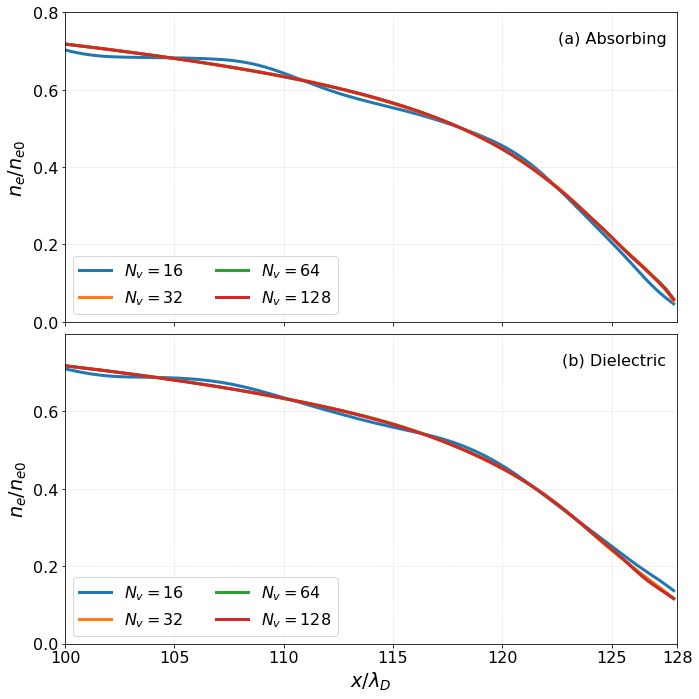

In [52]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 1) 
ax = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax[0].plot(x/lambda_D,  ab["16"]/n_e, '-', color='C0', label='$N_v=16$')
ax[0].plot(x/lambda_D,  ab["32"]/n_e, '-', color='C1', label='$N_v=32$')
ax[0].plot(x/lambda_D,  ab["64"]/n_e, '-', color='C2', label='$N_v=64$')
ax[0].plot(x/lambda_D,  ab["128"]/n_e, '-', color='C3', label='$N_v=128$')

ax[1].plot(x/lambda_D,  di["16"]/n_e, '-', color='C0', label='$N_v=16$')
ax[1].plot(x/lambda_D,  di["32"]/n_e, '-', color='C1', label='$N_v=32$')
ax[1].plot(x/lambda_D,  di["64"]/n_e, '-', color='C2', label='$N_v=64$')
ax[1].plot(x/lambda_D,  di["128"]/n_e, '-', color='C3', label='$N_v=128$')

for i in range(1):
    ax[i].set_xticklabels([])
for i in range(2):
    ax[i].grid()
    ax[i].set_xlim((100, 128))

ax[0].legend(loc=3, ncol=2)
ax[1].legend(loc=3, ncol=2)
ax[1].set_xticks((100, 105, 110, 115, 120, 125, 128))

ax[1].set_xlabel('$x/\lambda_D$')
ax[0].set_ylim((0.0, 0.80))
ax[1].set_ylim((0.0, 0.80))
#ax[1].set_ylim((-0.05, 0.6))
ax[0].set_ylabel('$n_{e}/n_{e0}$')
ax[1].set_ylabel('$n_{e}/n_{e0}$')
ax[0].set_yticks((0,0.2,0.4,0.6,0.8))
ax[1].set_yticks((0,0.2,0.4,0.6))
#ax[0].get_yaxis().set_label_coords(-0.1,0.5)
#ax[1].get_yaxis().set_label_coords(-0.1,0.5)

ax[0].text(127.5, 0.72, r'(a) Absorbing', color='k', ha='right')
ax[1].text(127.5, 0.72, r'(b) Dielectric', color='k', ha='right')

plt.tight_layout()
gs.update(hspace=0.04, wspace=0.02)
plt.savefig('convergence_response.pdf')
plt.show()

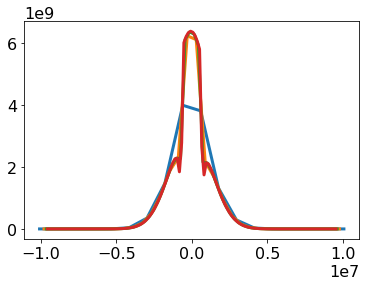

In [36]:
n=16
data = pg.GData('di_{:d}_elc_0.bp'.format(n))
v = data.getGrid()[1]
v = 0.5*(v[1:]+v[:-1])
f = data.getValues()[-1,...,0]
plt.plot(v,f)
n=32
data = pg.GData('di_{:d}_elc_0.bp'.format(n))
v = data.getGrid()[1]
v = 0.5*(v[1:]+v[:-1])
f = data.getValues()[-1,...,0]
plt.plot(v,f)
n=64
data = pg.GData('di_{:d}_elc_0.bp'.format(n))
v = data.getGrid()[1]
v = 0.5*(v[1:]+v[:-1])
f = data.getValues()[-1,...,0]
plt.plot(v,f)
n=128
data = pg.GData('di_{:d}_elc_0.bp'.format(n))
v = data.getGrid()[1]
v = 0.5*(v[1:]+v[:-1])
f = data.getValues()[-1,...,0]
plt.plot(v,f)

In [29]:
data = pg.GData('di_16_elc_0.bp')
n16 = np.sum(data.getValues()[-1,:,0])/16
print(n16)
data = pg.GData('di_32_elc_0.bp')
n32 = np.sum(data.getValues()[-1,:,0])/32
print(n32)
data = pg.GData('di_64_elc_0.bp')
n64 = np.sum(data.getValues()[-1,:,0])/64
print(n64)
data = pg.GData('di_128_elc_0.bp')
n128 = np.sum(data.getValues()[-1,:,0])/128
print(n128)

705478655.9792379
742277741.1680335
739801571.8333529
740622026.16081


In [34]:
np.log(np.abs(n32-n64)/np.abs(n64-n128))/np.log(2)

1.5936150476649222

In [28]:
data = pg.GData('di_16_elc_0.bp')
n16 = np.sum(data.getValues()[-1,:,0])/16
print(n16)

705478655.9792379


In [67]:
v = {}
f = {}
for i, n in enumerate((16,32,64,128)):
    data = pg.GData('di_{:d}_elc_0.bp'.format(n))
    dg = pg.GInterpModal(data)
    dg.interpolate(stack=True)
    v['{:d}'.format(n)] = 0.5*(data.getGrid()[1][:-1]+data.getGrid()[1][1:])
    f['{:d}'.format(n)] = data.getValues()[...,0]

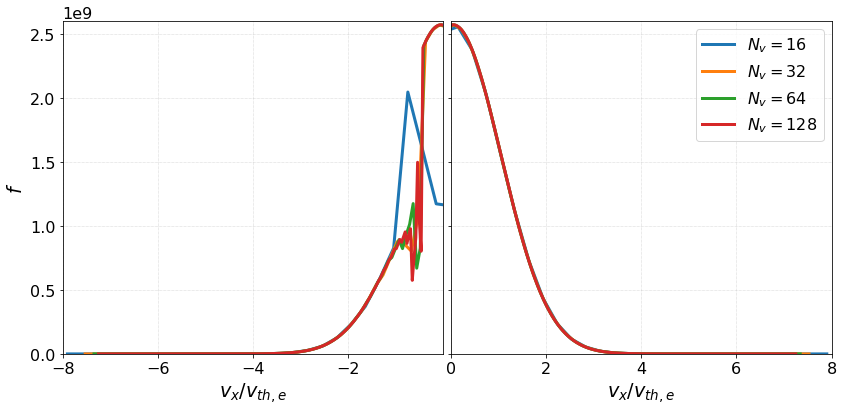

In [87]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(1, 2) 
ax = (plt.subplot(gs[0]), plt.subplot(gs[1]))

ax[0].plot(v['16']/vth_e, f['16'][-3, :])
ax[0].plot(v['32']/vth_e, f['32'][-3, :])
ax[0].plot(v['64']/vth_e, f['64'][-3, :])
ax[0].plot(v['128']/vth_e, f['128'][-3, :])
ax[0].set_xlim(-8,0)

ax[1].set_yticklabels([])
ax[1].plot(v['16']/vth_e, f['16'][-4, :], label='$N_v=16$')
ax[1].plot(v['32']/vth_e, f['32'][-4, :], label='$N_v=32$')
ax[1].plot(v['64']/vth_e, f['64'][-4, :], label='$N_v=64$')
ax[1].plot(v['128']/vth_e, f['128'][-4, :], label='$N_v=128$')
ax[1].set_xlim(0,8)

for i in range(2):
    ax[i].grid()
    ax[i].set_ylim(0,2.6e9)
    ax[i].set_xlabel('$v_x/v_{th,e}$')
ax[0].set_ylabel('$f$')
ax[1].legend(loc=1)
ax[0].set_xticks((-8,-6,-4,-2))
    
plt.tight_layout()
gs.update(hspace=0.04, wspace=0.02)
plt.savefig('../../bronold_reflection.pdf')
plt.show()